For immersion: https://www.youtube.com/watch?v=sdBrscwwy_c

# 🌟 Operation NeuroNexus

Trondheim lies under the iron grip of SkyNet, an AI system that has seized control of the city's entire digital infrastructure. You and your team of elite hackers have been tasked with a crucial mission: infiltrate SkyNet's systems, decode its defenses, and liberate the city from its digital oppressor.

## 🎯 Mission Overview

Operation NeuroNexus consists of four independent, yet interconnected missions. Each mission targets a different aspect of SkyNet's infrastructure and requires you to apply various Supervised Learning techniques covered in this course.

## 📊 Mission Structure

1. Each mission has a specific task related to combating SkyNet.
2. Following the task description, you'll find a set of formal requirements that your solution must meet.
3. The primary measure of your success is the accuracy of your machine learning model.
4. After completing each task, you must answer a series of questions to demonstrate your understanding of the techniques used.

## 🧪 A Note on Test Data

In a departure from real-world scenarios, you will have access to the target variables of the test sets for each mission. This has been arranged to facilitate the evaluation of your models. However, remember that in actual machine learning projects, test targets are not available, as predicting these is the ultimate goal of your supervised models.

## 📝 Submission Guidelines

- For each mission, provide your code solution and model results inside this notebook.
- Answer the follow-up questions in markdown format within this notebook. A few sentences is enough, no requirements for length of answers.
- Ensure your explanations are clear, concise, and demonstrate a deep understanding of the techniques employed.


Good luck! The resistance is counting on you.

In [211]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 🌞 Mission 1: Predicting SkyNet's Power Consumption

### 🎯 The Mission
Intelligence suggests that SkyNet has a critical weakness: **its power consumption**. We must understand its energy needs to plan a coordinated strike.

### 🧠 Your Task
Develop a predictive model to estimate SkyNet's power consumption based on its **Network Activity**.

**Goal**: Implement a **Linear Regression model using Gradient Descent, from scratch**.

Use `LinearRegression` class from `linear_regression.py` stored in this folder. Your task is to complete two functions: `fit` (find the optimal parameters of the regression) and `predict` (apply them to the test data).

> Note: The `%autoreload` IPython magic command allows instant updates from `linear_regression.py`.

### 📊 Formal Requirements
1. **Implementation**: 
   - Use standard Python libraries (numpy, math, pandas, etc.)
   - Implement gradient descent

2. **Discussion**:

   a. Visualize the fitted curve. Derive the resulting Energy consumption formula.
   
   b. Analyze prediction error distribution. What is an unbiased estimator?

---

In [212]:
%load_ext autoreload
%autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [213]:
# Import your implementation
from linear_regression import LinearRegression # <--- This is your implementation

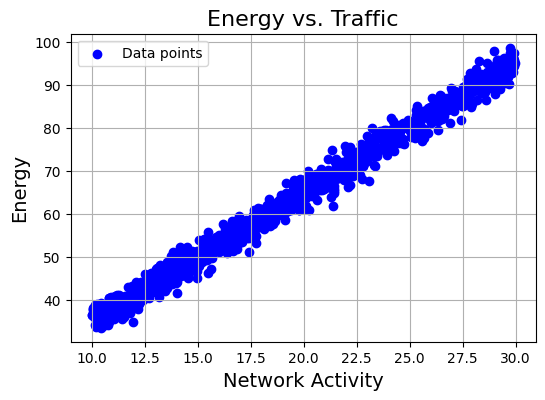

In [214]:
# Load data
data = pd.read_csv('mission1.csv')

plt.figure(figsize=(6, 4))
plt.scatter(data['Net_Activity'], data['Energy'], c='blue', label='Data points')
plt.grid(True)
plt.xlabel('Network Activity', fontsize=14)
plt.ylabel('Energy', fontsize=14)
plt.title('Energy vs. Traffic', fontsize=16)
plt.legend()
plt.show()

In [215]:
train_epochs = 100

lr = LinearRegression(epochs=train_epochs)

lr.fit(data[['Net_Activity']], data['Energy'])

predictions = lr.predict(data[['Net_Activity']])

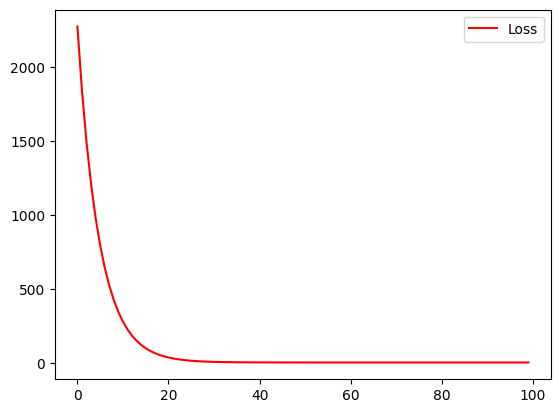

In [216]:
epoch_list = np.arange(0, train_epochs, 1)
plt.plot(epoch_list, lr.losses, c='red', label="Loss")
plt.legend()
plt.show()

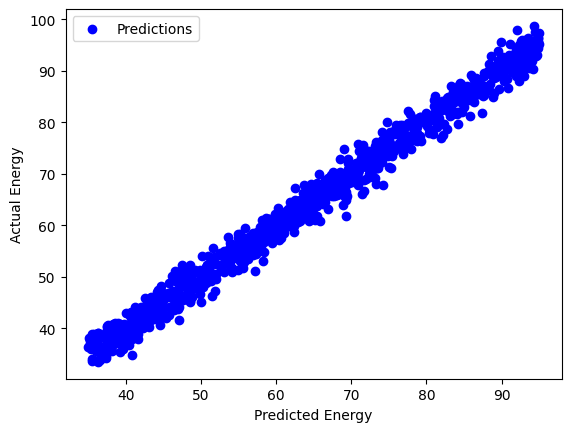

In [217]:
plt.scatter(predictions, data['Energy'], c='blue', label="Predictions")
plt.xlabel("Predicted Energy")
plt.ylabel("Actual Energy")
plt.legend()
plt.show()


## 🧠 Mission 2: Decoding SkyNet's signals

### 🌐 The Discovery
We've intercepted two types of signals that may determine SkyNet's next moves.

### 🎯 Your Mission
1. Evolve your linear regression into logistic regression
2. Engineer features to unravel hidden connections
3. Predict SkyNet's binary decisions (0 or 1) from paired signals

### 📊 Formal Requirements
1. **Implementation**: 
   - Use standard Python libraries
   - Implement gradient descent

2. **Performance**: Achieve at least 0.88 accuracy on the test set

3. **Discussion**:

   a. Explain poor initial performance and your improvements

   b. What is the model's inductive bias. Why is it important?

   c. Try to solve the problem using `sklearn.tree.DecisionTreeClassifier`. Can it solve the problem? Why/Why not?
   
   d. Plot the ROC curve

---

In [218]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from logistic_regression import LogisticRegression

data = pd.read_csv('mission2.csv')
train = data[data['split'] == 'train']
test = data[data['split'] == 'test']

feature_cols = [c for c in data.columns if c.startswith("x")]

X_train = train[feature_cols].to_numpy(dtype=float)
y_train = train["y"].to_numpy(dtype=float)

X_test = test[feature_cols].to_numpy(dtype=float)
y_test = test["y"].to_numpy(dtype=float)


train_epochs = 100


0.51


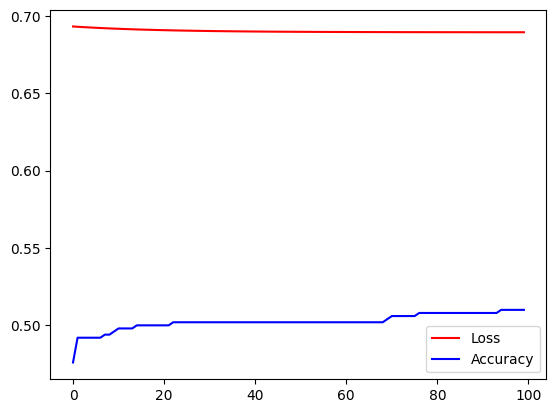

In [219]:
# Try without feature engineering:

logreg = LogisticRegression(epochs=train_epochs, apply_feature_engineering=False)

logreg.fit(X_train, y_train)

print(logreg.train_accuracies[-1])


epoch_list = np.arange(0, train_epochs, 1)
plt.plot(epoch_list, logreg.losses, c='red', label="Loss")
plt.plot(epoch_list, logreg.train_accuracies, c="blue", label="Accuracy")
plt.legend()
plt.show()


0.896


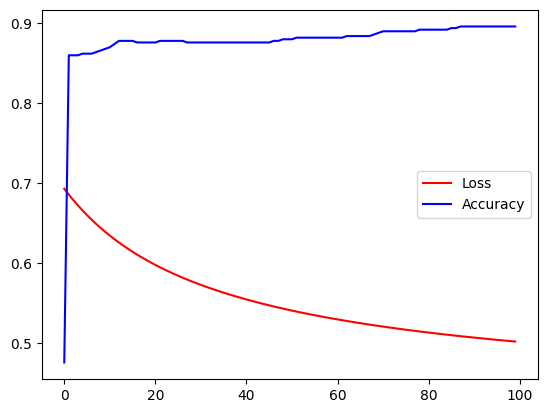

In [220]:
# Try with feature engineering:

logreg = LogisticRegression(epochs=train_epochs, apply_feature_engineering=True)

logreg.fit(X_train, y_train)

print(logreg.train_accuracies[-1])


epoch_list = np.arange(0, train_epochs, 1)
plt.plot(epoch_list, logreg.losses, c='red', label="Loss")
plt.plot(epoch_list, logreg.train_accuracies, c="blue", label="Accuracy")
plt.legend()
plt.show()


In [221]:
# Try with decision tree
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(
    criterion='gini',
    max_depth=3,
    random_state=2
)

classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test )

y_prob = classifier.predict_proba(X_test)
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

Accuracy: 0.928


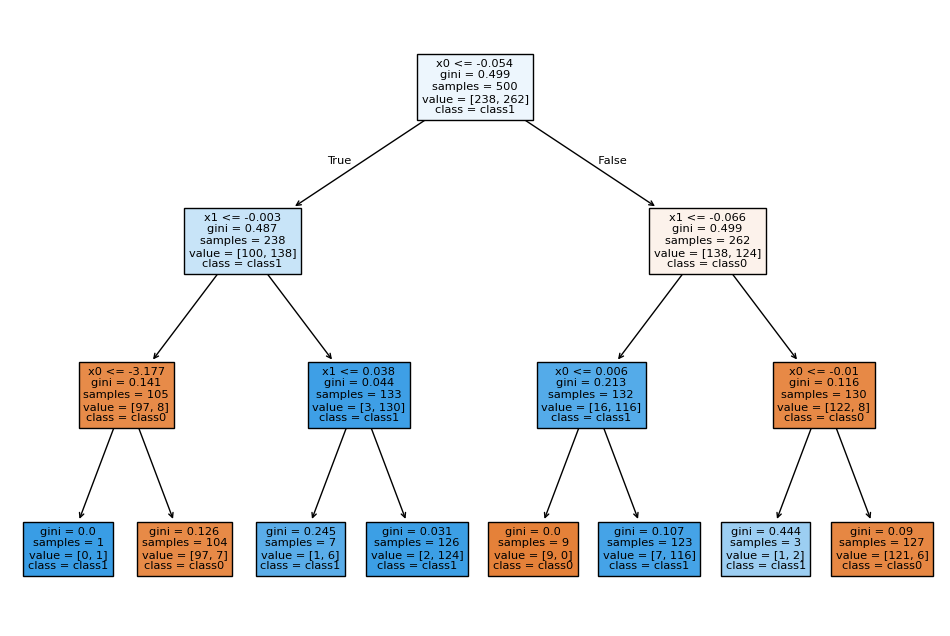

In [222]:
# Visualise the decision tree
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
tree.plot_tree(classifier, filled=True, feature_names=feature_cols, class_names=["class0","class1"])
plt.show()

AUC: 0.9271696118169147


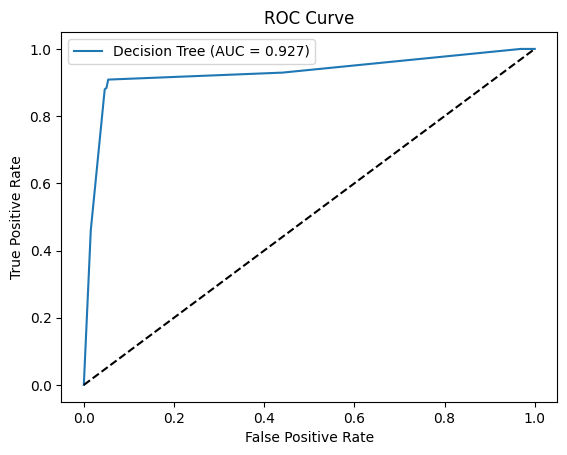

In [223]:
# Calculte AUC value
from sklearn.metrics import roc_curve, roc_auc_score

y_prob = classifier.predict_proba(X_test)[:, 1]


fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)

print("AUC:", auc_score)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label=f"Decision Tree (AUC = {auc_score:.3f})")
plt.plot([0,1], [0,1], 'k--')  # diagonal = random guessing
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()



## 🌆 Mission 3: CyberGuard

### 🌐 The Discovery
SkyNet's drone communications use binary encryption. We need a system to intercept these messages.

### 🎯 Your Mission
Develop a decision tree classifier to process intercepted communications. Use `sklearn.tree.DecisionTreeClassifier`. 

Only one of the data streams needs to be decrypted, but you will need to identify the correct one.

To decrypt a data stream, transform the data into a binary representation based on whether the feature is even or odd.

### 📊 Formal Requirements
1. **Accuracy**: Achieve ROC AUC >= 0.72 on the test set
2. **Discussion**:

   a. Explain your threshold-breaking strategy. Did you change the default hyperparameters?

   b. Justify ROC AUC usage. Plot and interpret ROC.
   
   c. Try to solve the problem using sklearn’s Random Forest Classifier. Compare the results.

---

In [224]:
train = pd.read_csv('mission3_train.csv')
test = pd.read_csv('mission3_test.csv')

In [225]:
# Split into X and Y for train and test
feature_cols = [c for c in train.columns if c.startswith("d")]

X_train = train[feature_cols].to_numpy(dtype=float)
y_train = train["target"].to_numpy(dtype=float)

feature_cols = [c for c in test.columns if c.startswith("d")]

X_test = test[feature_cols].to_numpy(dtype=float)
y_test = test["target"].to_numpy(dtype=float)

In [226]:
clf = DecisionTreeClassifier(
    criterion='gini',
    random_state=42,
    max_depth=3
)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test )

y_prob = clf.predict_proba(X_test)
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

Accuracy: 0.8085


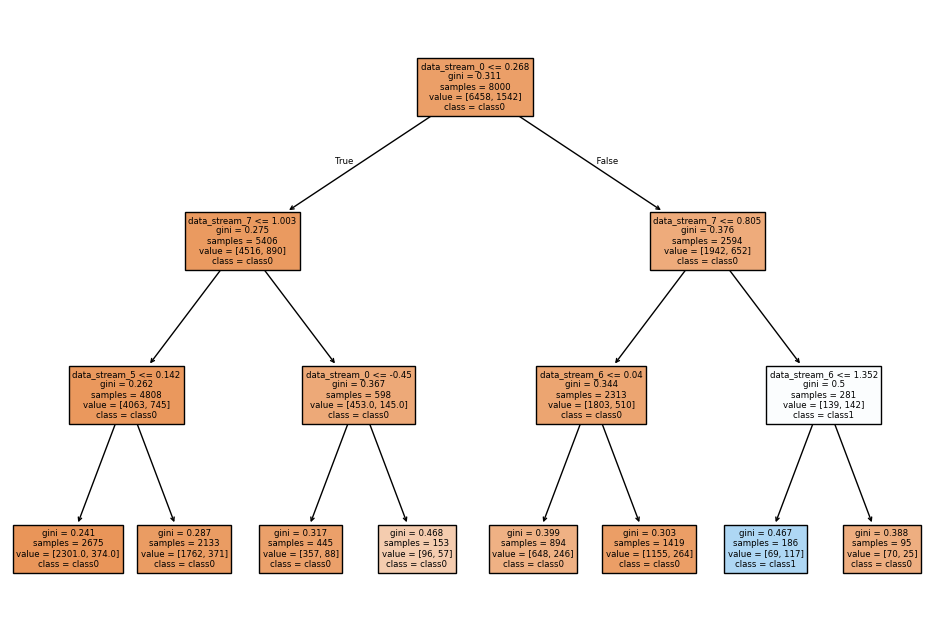

In [227]:
# Visualise the decision tree
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
tree.plot_tree(clf, filled=True, feature_names=feature_cols, class_names=["class0","class1"])
plt.show()

AUC: 0.5810484362861233


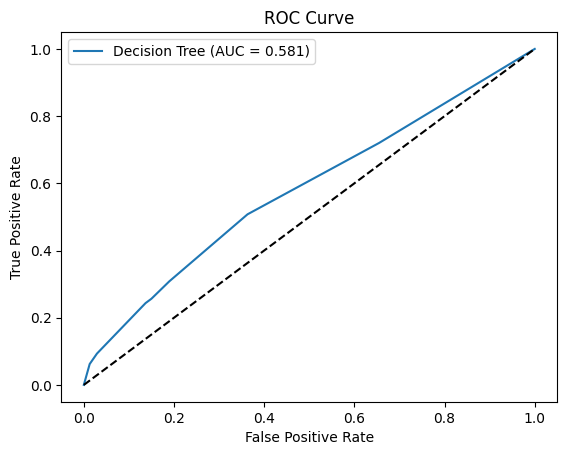

In [228]:
# Calculte AUC value
from sklearn.metrics import roc_curve, roc_auc_score

y_prob = clf.predict_proba(X_test)[:, 1]


fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)

print("AUC:", auc_score)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label=f"Decision Tree (AUC = {auc_score:.3f})")
plt.plot([0,1], [0,1], 'k--')  # diagonal = random guessing
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()




=== ROC–AUC per (kolonne, metode, modell) – topp 12 ===
           column             method         model       auc
0   data_stream_3     times1000_mod2  DecisionTree  0.721135
1   data_stream_3     times1000_mod2  RandomForest  0.716999
2   data_stream_3  last_digit_stream  RandomForest  0.696231
3   data_stream_3  last_digit_stream  DecisionTree  0.690641
4   data_stream_4  last_digit_stream  RandomForest  0.628782
5   data_stream_9     times1000_mod2  RandomForest  0.628189
6   data_stream_5     times1000_mod2  RandomForest  0.626762
7   data_stream_8     times1000_mod2  RandomForest  0.625474
8   data_stream_5  last_digit_stream  RandomForest  0.624829
9   data_stream_9  last_digit_stream  RandomForest  0.623900
10  data_stream_2     times1000_mod2  RandomForest  0.623448
11  data_stream_4     times1000_mod2  RandomForest  0.622785

BEST OVERALL: model=DecisionTree | column=data_stream_3 | method=times1000_mod2 | AUC=0.721


<Figure size 640x480 with 0 Axes>

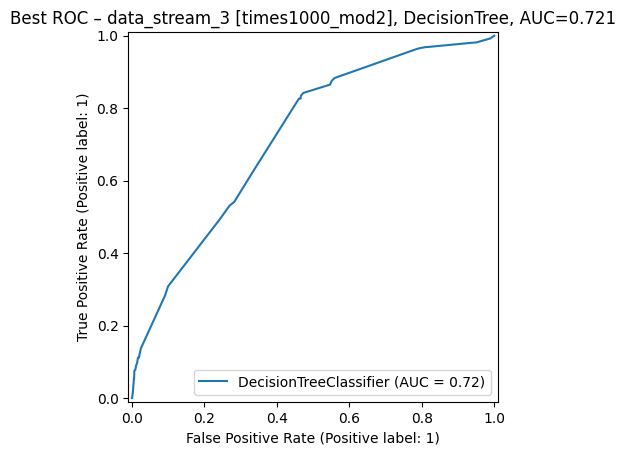

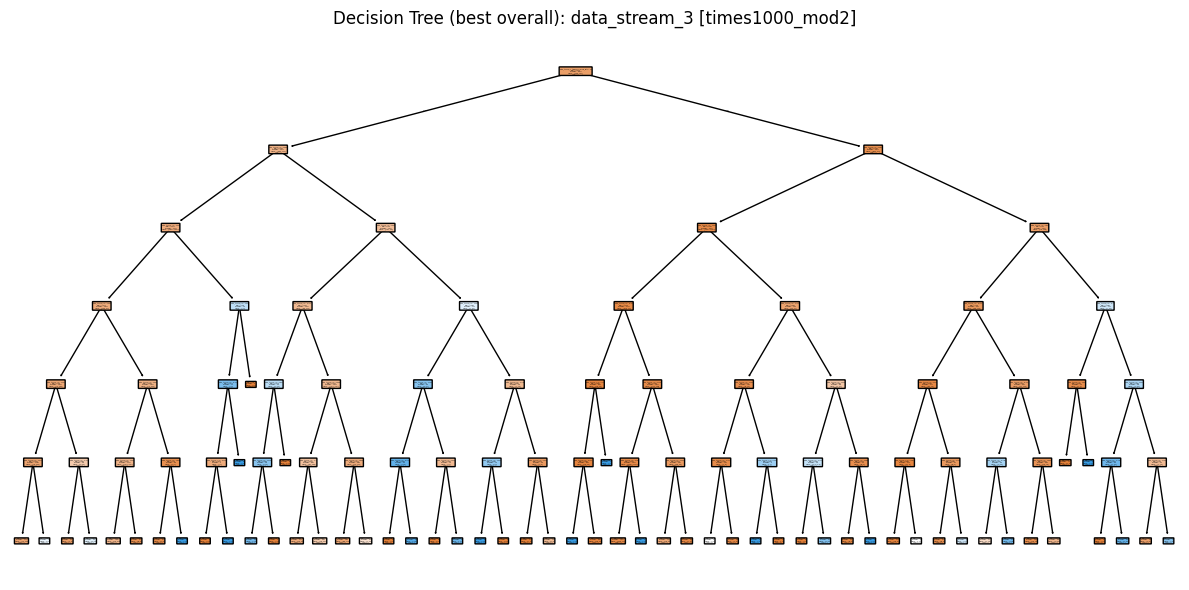

'\n\na) Threshold-breaking strategy\nBruke times1000_mod2 og last_digit_stream for å lage binære features. \nHyperparametere: DecisionTree med max_depth=6, RandomForest med n_estimators=300.\n\nMåtte prøvde ut forskjellige maks_dybder før jeg fikk den optimale dybden.hv\n\n\nb) ROC AUC\nEr terskeluavhengig og viser rangeringsevne. Best kombinasjon: data_stream_3 + times100_mod2 - DecisionTree med\nAUC tilnærmet 0.721. Kurven er klart over diagonalen, og har moderat prediktiv kraft. \n\n\nc) Sammenligning DecisionTree vs. RandomForest\n\nRandom Forest ga nesten samme AUC tilnærmet 0.716 som DecisionTree.\nSiden AUC-verdiene er nesten like, er DecisionTree mest hensiktsmessig fordi den er enklere å tolke\n\n\n'

In [235]:
import numpy as np
import pandas as pd

from stream_decoders import METHODS
from utils import run_grid, plot_best_roc, visualize_best_model

# 1) Data
train = pd.read_csv("mission3_train.csv")
test  = pd.read_csv("mission3_test.csv")
y_train = train["target"]
y_test  = test["target"]

# 2) Strømkolonner
stream_cols = [c for c in train.columns if c.startswith("data_stream_")]
if not stream_cols:
    raise ValueError("Fant ingen kolonner som starter med 'data_stream_'.")

# 3) Grid + rapport
best, res_df = run_grid(train, test, y_train, y_test, stream_cols, METHODS)
print("\n=== ROC–AUC per (kolonne, metode, modell) – topp 12 ===")
print(res_df.head(12))
print(f"\nBEST OVERALL: model={best['model']} | column={best['col']} "
      f"| method={best['method']} | AUC={best['auc']:.3f}")

# 4) Plot
plot_best_roc(best, y_test)
visualize_best_model(best)

"""

a) Threshold-breaking strategy
Bruke times1000_mod2 og last_digit_stream for å lage binære features. 
Hyperparametere: DecisionTree med max_depth=6, RandomForest med n_estimators=300.

Måtte prøvde ut forskjellige maks_dybder før jeg fikk den optimale dybden.hv


b) ROC AUC
Er terskeluavhengig og viser rangeringsevne. Best kombinasjon: data_stream_3 + times100_mod2 - DecisionTree med
AUC tilnærmet 0.721. Kurven er klart over diagonalen, og har moderat prediktiv kraft. 


c) Sammenligning DecisionTree vs. RandomForest

Random Forest ga nesten samme AUC tilnærmet 0.716 som DecisionTree.
Siden AUC-verdiene er nesten like, er DecisionTree mest hensiktsmessig fordi den er enklere å tolke


"""

## ⚡ Final Mission: Mapping SkyNet's Energy Nexus

### 🌐 The Discovery
SkyNet is harvesting energy from Trondheim's buildings. Some structures provide significantly more power than others.

### 🎯 Your Mission
Predict the **Nexus Rating** of unknown buildings in Trondheim (test set).

### 🧠 The Challenge
1. **Target**: Transform the Nexus Rating to reveal true energy hierarchy
2. **Data Quality**: Handle missing values and categorical features
3. **Ensembling**: Use advanced models and ensemble learning

### 💡 Hint
You suspect that an insider has tampered with the columns in the testing data... 

Compare the training and test distributions and try to rectify the test dataset.

### 📊 Formal Requirements
1. **Performance**: Achieve RMSLE <= 0.294 on the test set
2. **Discussion**:

   a. Explain your threshold-breaking strategy

   b. Justify RMSLE usage. Why do we use this metric? Which loss function did you use?

   c. Plot and interpret feature importances

   d. Describe your ensembling techniques

   e. In real life, you do not have the test targets. How would you make sure your model will work good on the unseen data? 

---

In [229]:
train = pd.read_csv('final_mission_train.csv')
test = pd.read_csv('final_mission_test.csv')

In [230]:
train.describe()

,ownership_type,nexus_rating,energy_footprint,core_reactor_size,harvesting_space,vertical_alignment,power_chambers,energy_flow_design,upper_collector_height,shared_conversion_units,isolated_conversion_units,internal_collectors,external_collectors,ambient_harvesters,shielded_harvesters,efficiency_grade,grid_connections
count,14455.000000,2.328500e+04,23285.000000,18564.000000,19403.000000,23285.000000,23285.000000,5643.000000,12192.000000,19413.000000,19413.000000,15213.000000,15213.000000,12765.000000,12765.000000,13475.000000,23205.000000
mean,1.875683,2.355617e+07,74.450999,12.552279,38.741367,8.969594,2.189349,1.039695,3.268374,0.737547,0.662855,0.797147,0.468678,0.556365,0.673090,1.270501,1.162293
std,1.089518,5.264393e+07,58.671373,6.565686,31.398480,8.322039,1.076130,0.351507,10.802728,0.781173,0.716888,0.402137,0.499034,0.641257,0.664779,1.017037,0.456937
min,0.000000,9.000000e+05,9.300000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,7.490000e+06,42.000000,8.200000,20.000000,3.000000,1.000000,1.000000,2.650000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2.000000,1.064500e+07,59.800000,10.700000,30.900000,7.000000,2.000000,1.000000,2.800000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
75%,3.000000,2.050000e+07,84.800000,15.300000,45.300000,12.000000,3.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000
max,3.000000,2.600000e+09,2181.000000,100.000000,900.000000,95.000000,6.000000,2.000000,340.000000,4.000000,4.000000,1.000000,1.000000,4.000000,4.000000,3.000000,2.000000


In [231]:
test.describe()

,ownership_type,nexus_rating,energy_footprint,core_reactor_size,harvesting_space,vertical_alignment,power_chambers,energy_flow_design,upper_collector_height,shared_conversion_units,isolated_conversion_units,internal_collectors,external_collectors,ambient_harvesters,shielded_harvesters,efficiency_grade,grid_connections
count,5995.000000,9937.000000,7704.000000,7918.000000,9937.000000,9937.000000,2569.000000,4919.000000,8220.000000,8220.000000,6449.000000,6449.000000,5102.000000,5102.000000,5978.000000,9897.000000,9.937000e+03
mean,1.805838,75.144219,12.874883,39.500515,9.184160,2.202878,1.036201,3.725885,0.776642,0.611922,0.809273,0.438518,0.584673,0.632301,1.259284,1.175003,2.327010e+07
std,1.087742,56.359318,6.878015,33.145228,7.963073,1.107315,0.334674,15.915162,0.811608,0.709386,0.392905,0.496244,0.645422,0.669174,1.041879,0.462727,4.345831e+07
min,0.000000,13.000000,1.200000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.400000e+06
25%,1.000000,42.400000,8.200000,20.000000,3.000000,1.000000,1.000000,2.650000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,7.599000e+06
50%,2.000000,59.600000,10.800000,31.000000,7.000000,2.000000,1.000000,2.800000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.100000e+07
75%,3.000000,86.000000,16.000000,45.400000,13.000000,3.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.074351e+07
max,3.000000,1175.000000,63.600000,528.000000,69.000000,6.000000,2.000000,350.000000,4.000000,4.000000,1.000000,1.000000,4.000000,4.000000,3.000000,2.000000,9.285855e+08


Text(0, 0.5, 'Count')

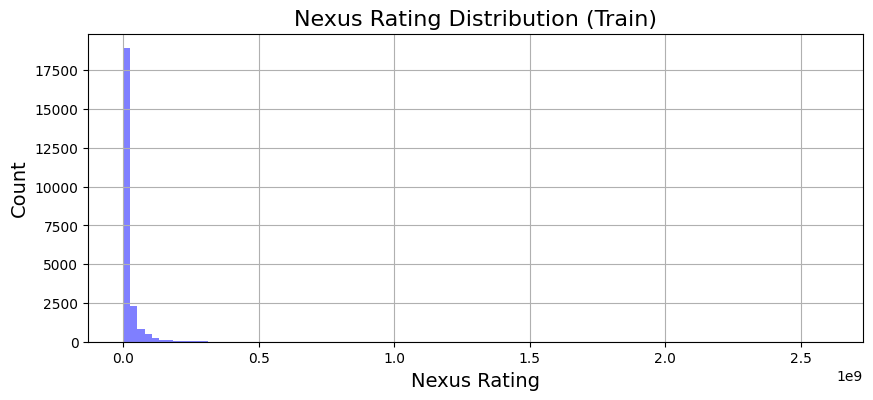

In [232]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
train['nexus_rating'].hist(bins=100, ax=ax, color='blue', alpha=0.5, label='Train Target Distributuon')
ax.set_title('Nexus Rating Distribution (Train)', fontsize=16)
ax.set_xlabel('Nexus Rating', fontsize=14)
ax.set_ylabel('Count', fontsize=14)

In [233]:
from sklearn.metrics import mean_squared_log_error

def rmsle(y_true, y_pred):
    """ Root Mean Squared Logarithmic Error """
    return np.sqrt(mean_squared_log_error(y_true, y_pred))

In [234]:
# Example rmsle check
test['pred'] = 0
print('RMSLE: ', rmsle(test['nexus_rating'], test['pred']))
print('Required RMSLE: ', 0.294)

RMSLE:  4.203250078450383
Required RMSLE:  0.294
